In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

os.getcwd()

'c:\\Users\\yoe_1\\OneDrive\\Escritorio\\CARPETA DOCUMENTOS\\PRACTICANDO CON PYTHON'

Objetivo: Conocer la relacion de los productos mas vendidos

In [3]:
data= pd.read_csv('Wholesale customers data.csv')

In [6]:
#Numero de Filas y columnas
data.shape

(440, 8)

In [7]:
#Se verifican datos nulos
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
#Información de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [24]:
# Se seleccionan datos al azar en la variable "Indices"  y se almacenan en "muestras" para posterioirmente verificar  el cluster al que pertenece
indices=[30,302,189]
muestras=  pd.DataFrame(data.loc[indices],columns=data.keys()).reset_index(drop=True)

In [25]:
# Se eleimina "muestras" del conjunto de datos originales para que el modelo no se entrene con dicha informacion
data=data.drop(indices, axis=0)

- PROCESAMIENTO DE DATOS

In [28]:
# Se eliminan las columnas region y canal ya que no contribuyen al objetivo del presente analisis
data=data.drop(['Region','Channel'],axis=1) 
muestras=muestras.drop(['Region','Channel'],axis=1) 

In [32]:
#Se realiza el escalamiento de los datos
from  sklearn import preprocessing
data_escalada=preprocessing.Normalizer().fit_transform(data)
muestra_escalada=preprocessing.Normalizer().fit_transform(muestras)

- Analisis de Machine Learning

In [38]:
#Libreria(s) necesarias
from sklearn.cluster import KMeans

In [39]:
# Se determina la variable a evaluar
x = data_escalada.copy()

In [40]:
# Para hallar el valor optimo de K se aplica el metodo del codo ( K= Número de clusters)
inercia=[]
for k in range(1,20):
    algoritmo=KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10)
    algoritmo.fit(x)
    #Para cada K, se calcula la suma total del cuadrado dentro del cluster
    inercia.append(algoritmo.inertia_)

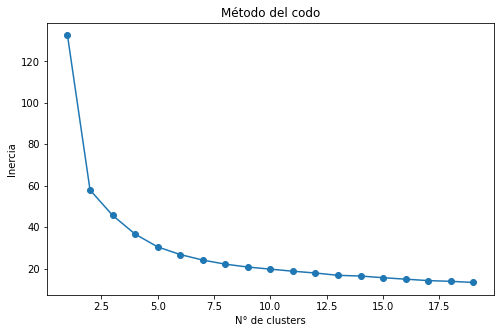

In [45]:
# Se grafica la curva de la suma de errores cuadraticos (codo)

plt.figure(figsize=[8,5])
plt.title('Método del codo')
plt.xlabel('N° de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1,20)),inercia,marker='o')
plt.show()


In [47]:
#Se aplica el 'algoritmo de clustering' / ya definimos k=5
## Se define el algoritmo
algoritmo= KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10)

In [48]:
##Se entrena el modelo
algoritmo.fit(x)

KMeans(n_clusters=5)

In [49]:
#Se obtienen los datos de los de los centroides y las etiquetas (etiq. son el numero de cluster al que pertenece)
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

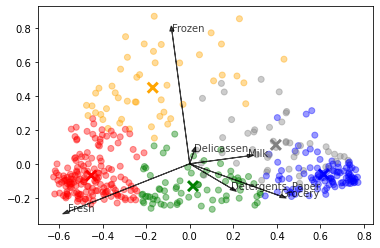

In [54]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(x)
pca = modelo_pca.transform(x) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()